In [15]:
import pandas as pd
data = pd.read_csv('glass.csv',delimiter=';', decimal=',')
df = pd.DataFrame(data)
df.style.hide_index()

ID,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0.001
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26
7,1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0,0
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.3,0,0
10,1.51755,13,3.6,1.36,72.99,0.57,8.4,0,0.11


In [17]:
def show_cluster(data,k):
    cluster = {}
    for i in range(k):
        cluster['Cluster ' + str(i)] = data[data["Cluster"].isin([i])].iloc[:,0].values
    dframe = pd.DataFrame.from_dict(cluster, orient='index')
    dframe = dframe.transpose()
    dframe = dframe.fillna("")
    return dframe.style.hide_index()

In [21]:
from sklearn.cluster import KMeans

k = 5
data_set = df.iloc[:,1:].values

kmeans = KMeans(n_clusters=k)
cluster = kmeans.fit(data_set)
data['Cluster'] = cluster.labels_


show_cluster(data,k)

Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
106,2,169,1,164
107,3,175,18,172
108,4,181,19,173
109,5,182,22,187
110,6,185,37,
111,7,190,39,
112,8,191,40,
113,9,192,44,
130,10,193,46,
131,11,194,48,


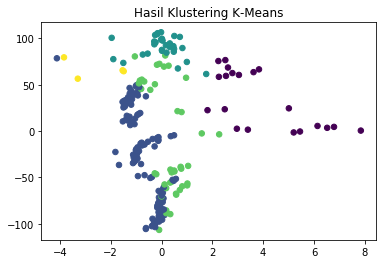

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(2)
# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(data.iloc[:,0:10])

# Plot based on the two dimensions, and shade by cluster label
plt.title("Hasil Klustering K-Means")
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=data["Cluster"], s=30)
plt.show()